# Улучшение процесса обогащения золота

## Постановка цели

Заказчиком является инжиниринговая компания, которая разрабатывает решения для эффективной работы промышленных предприятий.

Требуется подготовить прототип модели машинного обучения, которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Цель работы: на основе данных с параметрами добычи и очистки создать модель, предсказывающую коэффициент восстановления золота из золотосодержащей руды.
Перечень задач для осуществления поставленной цели:

    – подготовить данные;
    – провести исследовательский анализ данных;
    – построить и обучить модель.



## Данные

Мы располагаем набором данных, содержащим информацию о параметрах добычи и очистки, которые мы можем использовать для нашего анализа. Набор данных состоит из трех файлов:

* gold_recovery_train_new.csv - служит в качестве обучающей выборки.
* gold_recovery_test_new.csv - служит в качестве тестовой выборки.
* gold_recovery_full_new.csv - представляет собой исходные данные.

Набор данных организован на основе даты и времени получения информации, используя атрибут даты в качестве индекса. Как правило, параметры, смежные по времени, имеют тенденцию к сходству. Однако некоторые параметры могут отсутствовать в тестовом наборе из-за задержки процессов измерения и расчета. Следовательно, в тестовом наборе могут отсутствовать некоторые атрибуты, присутствующие в обучающем наборе. Кроме того, тестовый набор не содержит целевых признаков. Исходный набор данных включает в себя как обучающую, так и тестовую выборки, в том числе все признаки.

Перед построением модели мы должны убедиться в точности полученных исходных данных. Эти данные были непосредственно извлечены из хранилища. Очень важно проверить их корректность в соответствии с инструкциями, согласованными с клиентом.

## Наименование признаков

Наименование признаков строится по следующему правилу:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:

* **rougher** — флотация
* **primary_cleaner** — первичная очистка
* **secondary_cleaner** — вторичная очистка
* **final** — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

* **input** — параметры сырья
* **output** — параметры продукта
* **state** — параметры, характеризующие текущее состояние этапа
* **calculation** — расчётные характеристики

## Формулы

Требуется использовать следующие формулы для вычисления метрик качества.

Эффективность обогащения рассчитывается по формуле:

где:
- $C$ — доля золота в концентрате после флотации/очистки;
- $F$ — доля золота в сырье/концентрате до флотации/очистки;
- $T$ — доля золота в отвальных хвостах после флотации/очистки.

$$
Recovery = {{C \times (F - T)} \over {F \times (C - T)}} \times 100\%
$$

Для решения задачи введём новую метрику качества — **sMAPE** (Symmetric Mean Absolute Percentage Error - симметричное среднее абсолютное процентное отклонение).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных и одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:

$$
sMAPE = {1 \over N} \sum\limits_{i=1}^N {{|y_i - y'_i|} \over {(|y_i| + |y'_i|) / 2}} \times 100\%
$$

При работе над проектом требуется спрогнозировать сразу две величины эффективности обогащения:
- эффективность обогащения чернового концентрата `rougher.output.recovery`;
- эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика sMAPE складывается из двух величин:

$$
Final\_sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)
$$

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li>
      <span>
        <span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных
      </span>
      <ul class="toc-item">
        <li>
          <span>
            <span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файлов и их изучение
          </span>
        </li>
        <li>
          <span>
            <span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчёта эффективности обогащения
          </span>
        </li>
        <li>
          <span>
            <span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке
          </span>
        </li>
        <li>
          <span>
            <span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных
          </span>
        </li>
      </ul>
    </li>
    <li>
      <span>
        <span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных
      </span>
      <ul class="toc-item">
        <li>
          <span>
            <span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов на разных этапах очистки
          </span>
        </li>
        <li>
          <span>
            <span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках
          </span>
        </li>
        <li>
          <span>
            <span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях очистки
          </span>
        </li>
      </ul>
    </li>
    <li>
      <span>
        <span class="toc-item-num">3&nbsp;&nbsp;</span>Модель
      </span>
      <ul class="toc-item">
        <li>
          <span>
            <span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE
          </span>
        </li>
        <li>
          <span>
            <span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и выбор лучшей модели
          </span>
          <ul class="toc-item">
            <li>
              <span>
                <span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Лес
              </span>
            </li>
            <li>
              <span>
                <span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Линейная регрессия
              </span>
            </li>
            <li>
              <span>
                <span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Дерево решений
              </span>
            </li>
            <li>
              <span>
                <span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Лассо
              </span>
            </li>
            <li>
              <span>
                <span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Константная модель
              </span>
            </li>
            <li>
              <span>
                <span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Лучшее sMAPE
              </span>
            </li>
          </ul>
        </li>
        <li>
          <span>
            <span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тест модели
          </span>
        </li>
      </ul>
    </li>
    <li>
      <span>
        <span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги
      </span>
    </li>
  </ul>
</div>


# Восстановление золота из руды

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Созданная нами модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Цель работы: на основе данных с параметрами добычи и очистки создать модель, предсказывающую коэффициент восстановления золота из золотосодержащей руды.       
Перечень задач для осуществления поставленной цели:    

    – подготовить данные;
    – провести исследовательский анализ данных;
    – построить и обучить модель.



## 1 Подготовка данных

### 1.1 Открытие файлов и их изучение

In [40]:
import pandas as pd
import seaborn as sns
import statistics

import matplotlib.pyplot as mp

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from scipy.stats import ks_2samp
from scipy.stats import ttest_ind

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyRegressor

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [5]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


После изучения данных можно подметить, что все датафреймы имеют пропуски, с которыми мы будем бороться чуть позже. Также столбец `date` имеет тип данных `object`, а не `datetime`, что может помешать правильной сортировке по дате.

### 1.2 Проверка расчёта эффективности обогащения

In [11]:
handly_rougher_output_recovery = ((data_train['rougher.output.concentrate_au'] * 
                                   (data_train['rougher.input.feed_au'] - 
                                    data_train['rougher.output.tail_au'])) / 
                                  (data_train['rougher.input.feed_au'] * 
                                   (data_train['rougher.output.concentrate_au'] - 
                                    data_train['rougher.output.tail_au']))) * 100
handly_rougher_output_recovery[:5]

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [12]:
mae = mean_absolute_error(handly_rougher_output_recovery, 
                          data_train['rougher.output.recovery'])
mae

9.73512347450521e-15

MAE стремится к нулю, что говорит нам о правильном расчёте эффективности обогащения.

### 1.3 Анализ признаков, недоступных в тестовой выборке

In [13]:
train_cols = data_train.columns
test_cols = data_test.columns

In [14]:
train_not_test = (train_cols.difference(test_cols)).tolist()
train_not_test

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Как можно заметить, в тестовой выборке имеются данные по сырью, но не по продукту. Также отсутствуют расчётные характеристики.

### 1.4 Предобработка данных

In [15]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y%m%d %H:%M:%S')

In [16]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y%m%d %H:%M:%S')

In [17]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y%m%d %H:%M:%S')

Преобразуем дату из формата `object` в `datetime` во всех датасетах.

In [18]:
print(f'Количество пропусков в полном датасете до обработки: {sum(data_full.isna().sum())}')
data_full = data_full.fillna(method='ffill',axis=0)
print(f'Количество пропусков в полном датасете после обработки: {sum(data_full.isna().sum())}')

Количество пропусков в полном датасете до обработки: 4481
Количество пропусков в полном датасете после обработки: 0


Заполним пропуски в полном датасете соседними значениями.

In [19]:
print(f'Количество пропусков в тренировочном датасете до обработки: {sum(data_train.isna().sum())}')
data_train = data_train.fillna(data_train[['date']].merge(data_full, on='date', how='left'))
print(f'Количество пропусков в тренировочном датасете после обработки: {sum(data_train.isna().sum())}')

Количество пропусков в тренировочном датасете до обработки: 4100
Количество пропусков в тренировочном датасете после обработки: 0


Из-за больших интервалов между датами, заполним пустые значения в тренировочном датасете значениями из полного датасета.

## 2 Анализ данных

### 2.1 Изменение концентрации металлов на разных этапах очистки

In [20]:
def plotting_metall(cols, name):   
    global data_train
    temp = pd.DataFrame(data=data_train, columns=cols)
    mp.figure(figsize=(16,8))
    mp.grid()
    for col in temp:
        data_train = data_train[data_train[col] >= 0.009999999776482582]
        temp = temp[temp[col] >= 0.009999999776482582]
        mp.hist(temp[col], 300, alpha=0.5)
    mp.legend(labels=['До флотации', 'После флотации', 'Первичная очистка', 'Финальная очистка'])
    mp.xlabel('Концетрация')
    mp.ylabel('Количество')
    mp.title(f'Концетрация металла {name}');

Создадим функцию, которая визуализирует концетрацию металлов на различных этапах очистки. Также эта функция удаляет нулевые выбросы, являющиеся аномалиями.

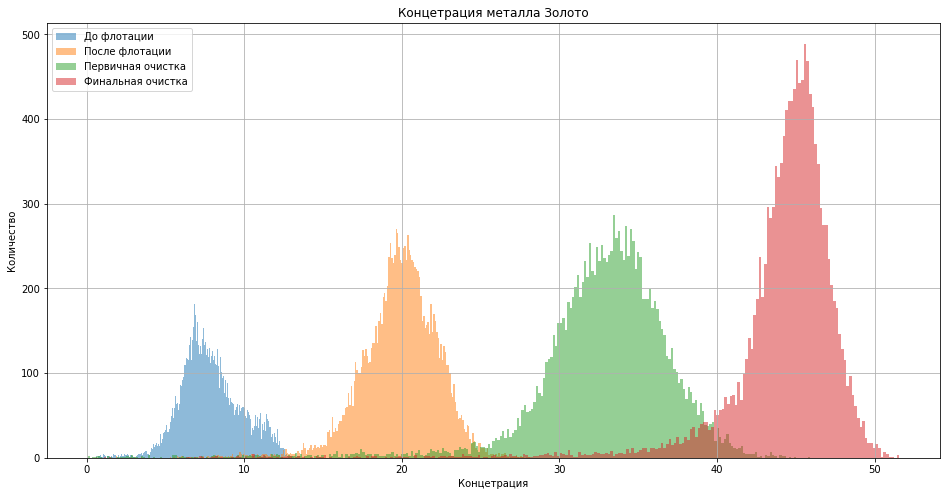

In [21]:
plotting_metall(['rougher.input.feed_au', 
                 'rougher.output.concentrate_au', 
                 'primary_cleaner.output.concentrate_au', 
                 'final.output.concentrate_au'], 
                'Золото')

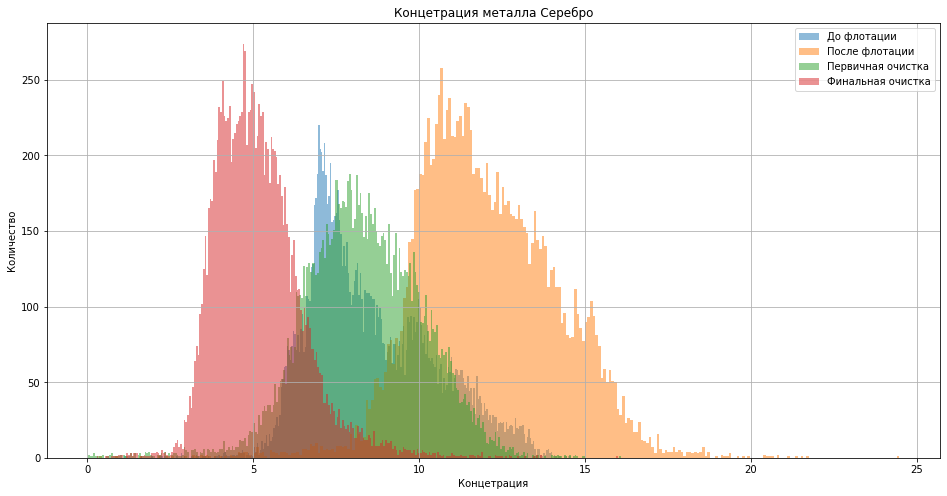

In [22]:
plotting_metall(['rougher.input.feed_ag', 
                 'rougher.output.concentrate_ag', 
                 'primary_cleaner.output.concentrate_ag', 
                 'final.output.concentrate_ag'], 'Серебро')

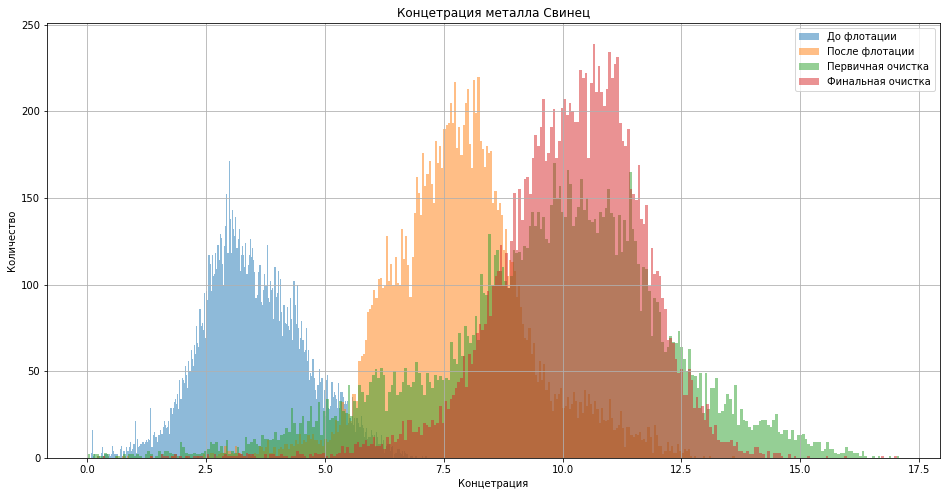

In [23]:
plotting_metall(['rougher.input.feed_pb', 
                 'rougher.output.concentrate_pb', 
                 'primary_cleaner.output.concentrate_pb', 
                 'final.output.concentrate_pb'], 
                'Свинец')

По графикам можно понять, что концетрация золота действительно повышается после каждого этапа очистки, что говорит нам об эффективности технологического процесса.

Остальные же металлы постепенно выходят из очистительного процесса вместе с "отвальными хвостами".

### 2.2 Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

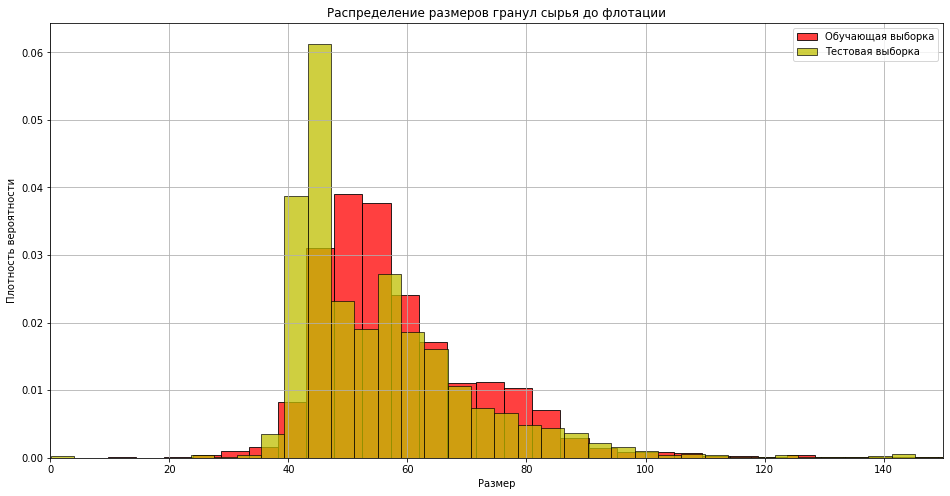

In [24]:
mp.figure(figsize=(16,8))
mp.grid()
sns.histplot(data=data_train, 
             x='rougher.input.feed_size', 
             color='r', palette='pastel', 
             alpha=0.75, 
             bins=100, 
             stat='density', 
             common_norm=False)

sns.histplot(data=data_test, 
             x='rougher.input.feed_size', 
             color='y', 
             palette='pastel', 
             alpha=0.75, 
             bins=100, 
             stat='density', 
             common_norm=False)

mp.xlim(0, 150)
mp.title("Распределение размеров гранул сырья до флотации")
mp.legend(labels=['Обучающая выборка', 'Тестовая выборка'])
mp.xlabel('Размер')
mp.ylabel('Плотность вероятности');

Из графика видно, что распределение размеров гранул сырья на обучающей выборке смещено вправо относительно тестовой. При этом оба распределения похожи на нормальные.

Чтобы сравнить выборки с математической точки зрения, выполним ttest.

H₀: распределения размеров гранул сырья на обучающей и тестовой выборках равны.    
H₁: распределения размеров гранул сырья на обучающей и тестовой выборках различаются.

In [25]:
alpha = 0.01

In [26]:
stat_tt, p_value_tt = ttest_ind(data_train['rougher.input.feed_size'], 
                                data_test['rougher.input.feed_size'].dropna(), equal_var=False)
print(f'p-value по результатам ttest: {p_value_tt}')

p-value по результатам ttest: 2.4994108592567153e-38


In [27]:
stat_ks, p_value_ks = ks_2samp(data_train['rougher.input.feed_size'], 
                               data_test['rougher.input.feed_size'].dropna())
print(f'p-value по результатам критерия Колмогорова — Смирнова: {p_value_ks}')

p-value по результатам критерия Колмогорова — Смирнова: 7.931859690421165e-211


Оба p-value оказалсь ниже уровня значимости, поэтому отвергаем теорию о равенстве распределений.    
Статистически распределения различаются, но визуально они похожи, так что можно продолжить работу.

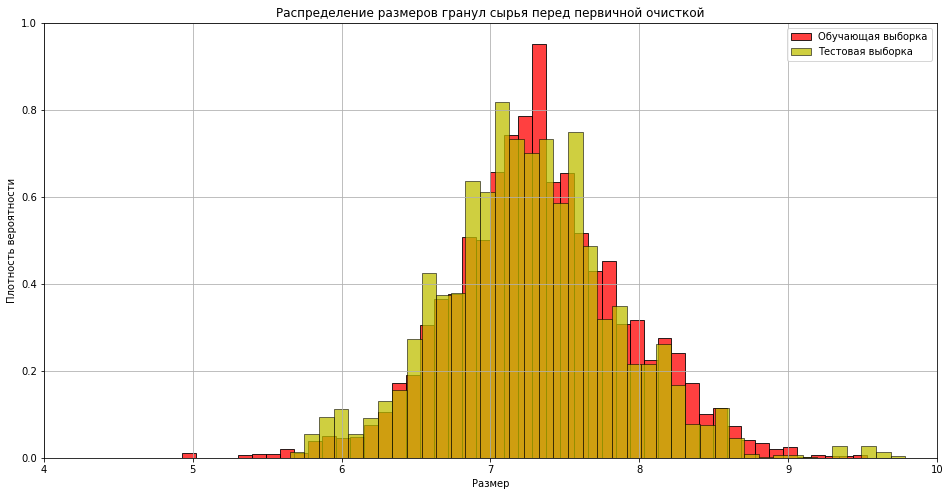

In [28]:
mp.figure(figsize=(16,8))
mp.grid()
sns.histplot(data=data_train, 
             x='primary_cleaner.input.feed_size', 
             color='r', palette='pastel', 
             alpha=0.75, 
             bins=100, 
             stat='density', 
             common_norm=False)

sns.histplot(data=data_test, 
             x='primary_cleaner.input.feed_size', 
             color='y', 
             palette='pastel', 
             alpha=0.75, 
             bins=100, 
             stat='density', 
             common_norm=False)

mp.xlim(4, 10)
mp.title("Распределение размеров гранул сырья перед первичной очисткой")
mp.legend(labels=['Обучающая выборка', 'Тестовая выборка'])
mp.xlabel('Размер')
mp.ylabel('Плотность вероятности');

А вот перед первичной очисткой размеры гранул уже нормализовались, гранулы разбили до одинаковых размеров: до флотации они были размером 20-120, а перед первичной очисткой уже 5-10. Графики тестовой и обучающей выборки чуть ли не совадают 1 в 1. Очистка идёт по плану.

### 2.3 Исследование суммарной концентрации всех веществ на разных стадиях очистки

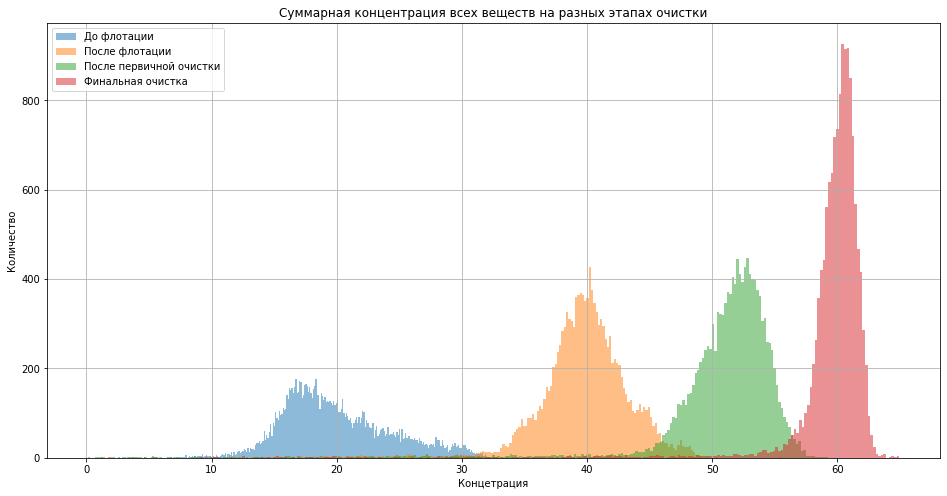

In [29]:
sum_component_df = pd.DataFrame()
sum_component_df['feed_all'] = data_train[['rougher.input.feed_au', 
                                           'rougher.input.feed_ag', 
                                           'rougher.input.feed_pb']].sum(axis=1)
sum_component_df['rougher_output_all'] = data_train[['rougher.output.concentrate_au', 
                                                     'rougher.output.concentrate_ag', 
                                                     'rougher.output.concentrate_pb']].sum(axis=1)
sum_component_df['primary_clean_all'] = data_train[['primary_cleaner.output.concentrate_au', 
                                                     'primary_cleaner.output.concentrate_ag', 
                                                     'primary_cleaner.output.concentrate_pb']].sum(axis=1)
sum_component_df['final_output_all'] = data_train[['final.output.concentrate_au',
                                                   'final.output.concentrate_ag', 
                                                   'final.output.concentrate_pb']].sum(axis=1)

mp.figure(figsize=(16,8))
mp.grid()
for col in sum_component_df:
    mp.hist(sum_component_df[col], 300, alpha=0.5)
mp.legend(labels=['До флотации', 'После флотации', 'После первичной очистки', 'Финальная очистка'])
mp.xlabel('Концетрация')
mp.ylabel('Количество')
mp.title('Суммарная концентрация всех веществ на разных этапах очистки');

На графике ясно видно, что после каждого этапа концетрация интересующих нас металлов увеличивается. После флотации на каждом этапе имеет место быть прирост в 10%, что можно назвать успехом.

## 3 Модель

### 3.1 Функция для вычисления итоговой sMAPE

In [30]:
def smape(target, predictions):
    mape = abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)
    s = mape.sum()
    smape_value = (1/target.shape[0]) * s * 100
    return smape_value

In [31]:
def end_smape(smape_rougher, smape_final):
    end_smape_value = (smape_rougher * 0.25) + (smape_final * 0.75)
    return end_smape_value

Функции для вычисления sMAPE и итогового sMAPE готовы.

### 3.2 Обучение и выбор лучшей модели

In [32]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [34]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

Создадим 2 столбца с величинами, которые надо предсказать, в тестовой выборке. Данные возьмём из полного датасета.

In [35]:
new_data_train = data_train[data_test.columns]

Перед обучением модели в обучающей выборке уберем те столбцы, которые отсутствуют в тестовой выборке.

In [36]:
target_train_rougher = new_data_train['rougher.output.recovery']
target_train_final = new_data_train['final.output.recovery']
features_train = new_data_train.drop(['rougher.output.recovery', 
                                      'final.output.recovery', 
                                      'date'], axis=1)

target_test_rougher = data_test.dropna()['rougher.output.recovery']
target_test_final = data_test.dropna()['final.output.recovery']
features_test = data_test.dropna().drop(['rougher.output.recovery', 
                                'final.output.recovery', 
                                'date'], axis=1)

In [37]:
smape_error = make_scorer(smape, greater_is_better=False)

Создадим таргеты и фичи в датасетах.

#### 3.2.1 Лес

In [44]:
def forest_model_halving(target, features):
    param_grid = {
    "max_depth": list(range(1, 15)),
    "n_estimators": list(range(80, 151, 5)),
    "min_samples_split": list(range(2, 6)),
    "min_samples_leaf": list(range(1, 6))
}
    model = RandomForestRegressor(random_state=222)
    halving_cv = HalvingGridSearchCV(model, 
                                     param_grid, 
                                     n_jobs=-1, 
                                     scoring=smape_error, 
                                     min_resources="exhaust", 
                                     factor=5, 
                                     random_state=222)
    halving_cv.fit(features, target)
    return halving_cv.best_params_, abs(halving_cv.best_score_)

In [45]:
%%time
best_params_fr, best_score_fr = forest_model_halving(target_train_rougher, features_train)
print(f'Лучшие параметры для леса (сырьё): {best_params_fr}')
print(f'Лучшая точность для леса (сырьё): {best_score_fr}')

Лучшие параметры для леса (сырьё): {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 85}
Лучшая точность для леса (сырьё): 6.5818695378427154
CPU times: user 1h 13min 44s, sys: 43.5 s, total: 1h 14min 27s
Wall time: 1h 14min 34s


In [46]:
%%time
best_params_ff, best_score_ff = forest_model_halving(target_train_final, features_train)
print(f'Лучшие параметры для леса (финальный продукт): {best_params_ff}')
print(f'Лучшая точность для леса (финальный продукт): {best_score_ff}')

Лучшие параметры для леса (финальный продукт): {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}
Лучшая точность для леса (финальный продукт): 9.597295658962816
CPU times: user 1h 3min 19s, sys: 40.9 s, total: 1h 3min 59s
Wall time: 1h 4min 4s


#### 3.2.2 Линейная регрессия

In [87]:
def lineal_model(target, features):
    model = LinearRegression()
    model.fit(features, target)
    predicted = model.predict(features)
    score_smape = cross_val_score(model, 
                                  features, 
                                  target, 
                                  cv=5, 
                                  n_jobs=-1, 
                                  scoring=smape_error)
    score_smape_mean = statistics.mean(score_smape)
    return abs(score_smape_mean)

In [88]:
%%time
best_score_lr = lineal_model(target_train_rougher, features_train)
print(f'Лучшая точность для линейной регрессии (сырьё): {best_score_lr}')

Лучшая точность для линейной регрессии (сырьё): 7.272356520748585
CPU times: user 756 ms, sys: 947 ms, total: 1.7 s
Wall time: 1.71 s


In [89]:
%%time
best_score_lf = lineal_model(target_train_final, features_train)
print(f'Лучшая точность для линейной регрессии (финальный продукт): {best_score_lf}')

Лучшая точность для линейной регрессии (финальный продукт): 11.005163449084746
CPU times: user 625 ms, sys: 1.02 s, total: 1.64 s
Wall time: 1.6 s


#### 3.2.3 Дерево решений

In [50]:
def tree_model_halving(target, features):
    param_grid = {
    "max_depth": list(range(1, 15)),
    "min_samples_split": list(range(2, 7)),
    "min_samples_leaf": list(range(1, 6))
}
    model = DecisionTreeRegressor(random_state=222)
    halving_cv = HalvingGridSearchCV(model, 
                                     param_grid, 
                                     n_jobs=-1, 
                                     scoring=smape_error, 
                                     min_resources="exhaust", 
                                     factor=5, 
                                     random_state=222)
    halving_cv.fit(features, target)
    return halving_cv.best_params_, abs(halving_cv.best_score_)

In [51]:
%%time
best_params_tr, best_score_tr = tree_model_halving(target_train_rougher, features_train)
print(f'Лучшие параметры для дерева (сырьё): {best_params_tr}')
print(f'Лучшая точность для дерева (сырьё): {best_score_tr}')

Лучшие параметры для дерева (сырьё): {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 6}
Лучшая точность для дерева (сырьё): 6.76160212770546
CPU times: user 28.7 s, sys: 76 ms, total: 28.8 s
Wall time: 28.9 s


In [52]:
%%time
best_params_tf, best_score_tf = tree_model_halving(target_train_final, features_train)
print(f'Лучшие параметры для дерева (финальный продукт): {best_params_tf}')
print(f'Лучшая точность для дерева (финальный продукт): {best_score_tf}')

Лучшие параметры для дерева (финальный продукт): {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 4}
Лучшая точность для дерева (финальный продукт): 9.244420374150659
CPU times: user 24.1 s, sys: 119 ms, total: 24.2 s
Wall time: 24.5 s


#### 3.2.4 Лассо

In [51]:
def lasso_model(target, features):
    param_grid = {
    "lasso__alpha": [x / 10.0 for x in range(1, 11)],
    "lasso__max_iter": list(range(501, 2501, 25))
}
    model = Lasso(random_state=222)
    halving_cv = HalvingGridSearchCV(make_pipeline(StandardScaler(), model), 
                                     param_grid, 
                                     n_jobs=-1, 
                                     scoring=smape_error, 
                                     min_resources="exhaust", 
                                     factor=5, 
                                     random_state=222, 
                                     refit=True)
    halving_cv.fit(features, target)
    return halving_cv.best_params_, abs(halving_cv.best_score_)

In [52]:
%%time
best_params_lsr, best_score_lsr = lasso_model(target_train_rougher, features_train)
print(f'Лучшие параметры для лассо (сырьё): {best_params_lsr}')
print(f'Лучшая точность для лассо (сырьё): {best_score_lsr}')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.543976208298738, tolerance: 0.20213406136813802
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17817241488418034, tolerance: 0.08984821408292361
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2199445422893973, tolerance: 0.08868040189299857
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Obje

Лучшие параметры для лассо (сырьё): {'lasso__alpha': 0.9, 'lasso__max_iter': 701}
Лучшая точность для лассо (сырьё): 6.746654235920275
CPU times: user 1min 5s, sys: 26 s, total: 1min 31s
Wall time: 1min 31s


In [53]:
%%time
best_params_lsf, best_score_lsf = lasso_model(target_train_final, features_train)
print(f'Лучшие параметры для лассо (финальный продукт): {best_params_lsf}')
print(f'Лучшая точность для лассо (финальный продукт): {best_score_lsf}')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.624974627733824, tolerance: 0.12120895089991271
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38198663515366604, tolerance: 0.12498790631190954
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.227033314598577, tolerance: 0.11657953174409441
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objec

Лучшие параметры для лассо (финальный продукт): {'lasso__alpha': 1.0, 'lasso__max_iter': 1476}
Лучшая точность для лассо (финальный продукт): 9.181542530461616
CPU times: user 1min 6s, sys: 27 s, total: 1min 33s
Wall time: 1min 33s


#### 3.2.5 Константная модель

In [83]:
def dummy_regr(target, features):
    model = DummyRegressor(strategy="mean")
    model.fit(features, target)
    predicted = model.predict(features)
    score_smape = cross_val_score(model, 
                                  features, 
                                  target, 
                                  cv=5, 
                                  n_jobs=-1, 
                                  scoring=smape_error)
    score_smape_mean = statistics.mean(score_smape)
    return abs(score_smape_mean)

In [84]:
%%time
best_score_dr = dummy_regr(target_train_rougher, features_train)
print(f'Лучшая точность для константной модели (сырьё), основанной на среднем: {best_score_dr}')

Лучшая точность для константной модели (сырьё), основанной на среднем: 7.75857598925329
CPU times: user 22.6 ms, sys: 3.94 ms, total: 26.5 ms
Wall time: 24.6 ms


In [85]:
%%time
best_score_df = dummy_regr(target_train_final, features_train)
print(f'Лучшая точность для константной модели (финальный продукт), основанной на среднем: {best_score_df}')

Лучшая точность для константной модели (финальный продукт), основанной на среднем: 10.26111264941808
CPU times: user 20.1 ms, sys: 4 ms, total: 24.1 ms
Wall time: 22.5 ms


#### 3.2.6 Лучшее sMAPE

Самую лучшую точность sMAPE для сырья показала модель леса.     
Точность: ~6.582    
Гиперпараметры:     

    — max_depth: 8
    — min_samples_leaf: 5
    — min_samples_split: 4
    — n_estimators: 85

Самую лучшую точность sMAPE для финального продукта показала модель лассо.     
Точность: ~9.182  
Гиперпараметры:     

    — alpha: 1
    — max_iter: 1476

Обе модели прошли порог на адекватность (7.758 для сырья и 10.261 для финального продукта).

In [56]:
end_smape_value = end_smape(best_score_fr, best_score_lsf)
print(f'Итоговое sMAPE: {end_smape_value}')

Итоговое sMAPE: 8.531624282306892


### 3.3 Тест модели

In [60]:
def forest_test(target_train, features_train, target_test, features_test, max_depth, min_samples_leaf, min_samples_split, n_estimators):
    model = RandomForestRegressor(max_depth=max_depth, 
                                  min_samples_leaf=min_samples_leaf, 
                                  min_samples_split=min_samples_split, 
                                  n_estimators=n_estimators,
                                  random_state=222)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    smape_value = smape(target_test, predictions)
    return smape_value

In [58]:
def lasso_test(target_train, features_train, target_test, features_test, alpha, max_iter):
    model = Lasso(alpha=alpha, 
                  max_iter=max_iter, 
                  random_state=222)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    smape_value = smape(target_test, predictions)
    return smape_value

In [61]:
%%time
smape_test_rougher = forest_test(target_train_rougher, features_train, target_test_rougher, features_test, 8, 5, 4, 85)
print(f'sMAPE для сырья (тестовая выборка): {smape_test_rougher}')

sMAPE для сырья (тестовая выборка): 7.807136255517063
CPU times: user 24.4 s, sys: 0 ns, total: 24.4 s
Wall time: 24.4 s


In [62]:
%%time
smape_test_final = lasso_test(target_train_final, features_train, target_test_final, features_test, 1, 1476)
print(f'sMAPE для финального продукта (тестовая выборка): {smape_test_final}')

sMAPE для финального продукта (тестовая выборка): 9.001614101814912
CPU times: user 663 ms, sys: 878 ms, total: 1.54 s
Wall time: 1.52 s


In [63]:
smape_test_end = end_smape(smape_test_rougher, smape_test_final)
print(f'Итоговый sMAPE для финальной выборки равен: {smape_test_end}')

Итоговый sMAPE для финальной выборки равен: 8.70299464024045


Итоговый показатель sMAPE показал хорошие результаты (~8.7). Предсказания на тестовой выборке оказались очень близки к обучающим, что можно считать успехом.

## 4 Итоги

После тщательного изучения выданных изначально данных мы провели предобработку, преобразовав пустые значения и заменив некоторые типы данных.

После мы принялись за анализ данных, в ходе которого выяснили, что концетрация золота повышается после каждого этапа очистки, остальные металлы же постепенно выходят вместе с "отвальными хвостами".         
Графики нам показали, что гранулы были разбиты до одинаковых размеров: до флотации они были размером 20-120, а перед первичной очисткой уже 5-10.      
Также мы заметили, что после каждого этапа концетрация интересующих нас металлов (золото, серебро, свинец) увеличивается. После флотации на каждом этапе имеет место быть прирост в 10%.    
Это всё говорит нам об эффективности технологического процесса.    

Мы исследовали 4 вида моделей: линейную регрессию, лассо, дерево решений и лес.    
После тщательного подбора гипер-параметров мы достигли высоких показателей точности этих моделей, но лучшими оказались именно модель ласо (на примере сырья) и модель решающего дерева (на примере финального продукта), которые были успешно протестированы. 
Результат тестирования приблизился к предыдущим предсказаниям на обучающей выборке.   

В итоге мы получили модель, помогающую оптимизировать золотодобывающее производство, чтобы не запускать предприятие с убыточными характеристиками.